<a href="https://colab.research.google.com/github/dukgeunchoi/cancer-diagnosis-pred/blob/main/cancer_diagnosis_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Concatenate
from keras.optimizers import Adam
import random
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

Loading the data

In [ ]:
df = pd.read_csv('breast_cancer_wisconsin.csv')

**Performing Exploratory Data Analysis**



Encoding the target variable

In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

Checking for missing values

In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Making correlation matrix

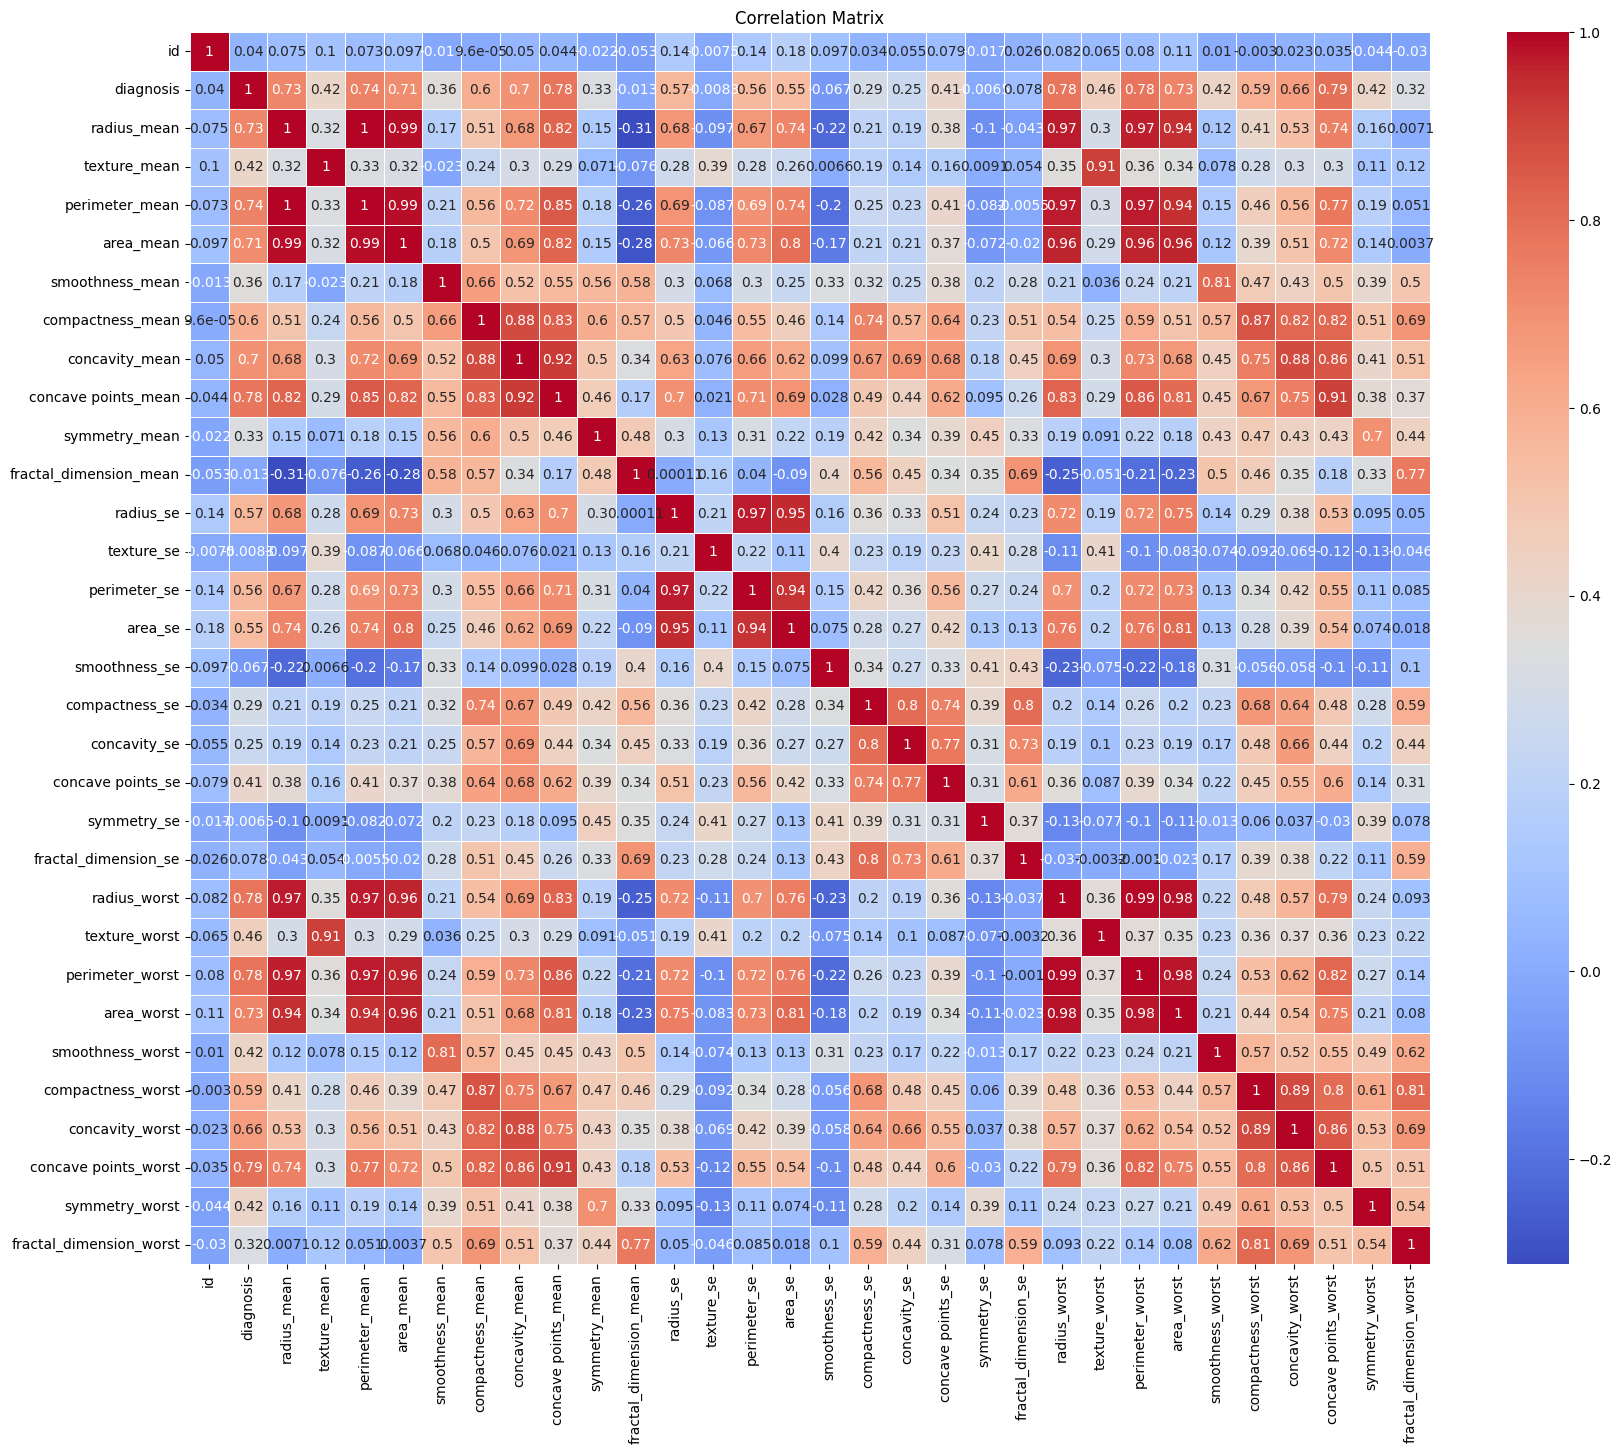

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Making box plots for each feature by diagnosis

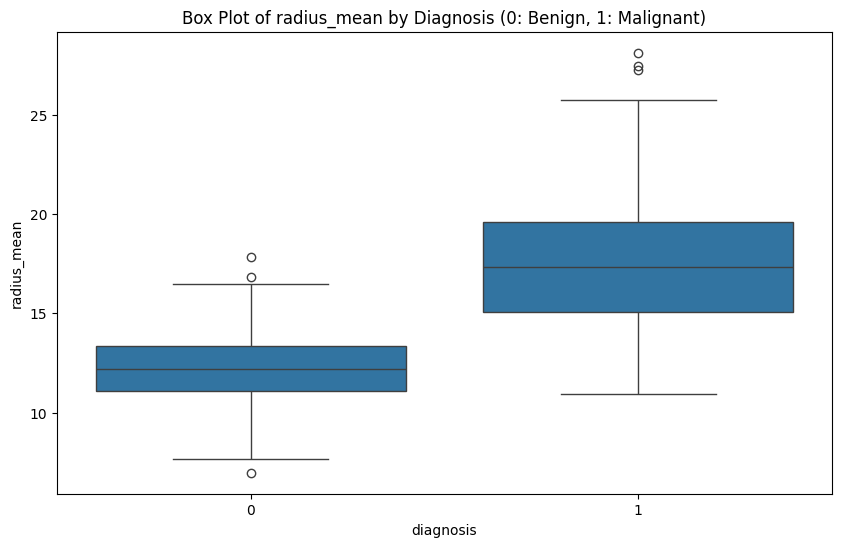

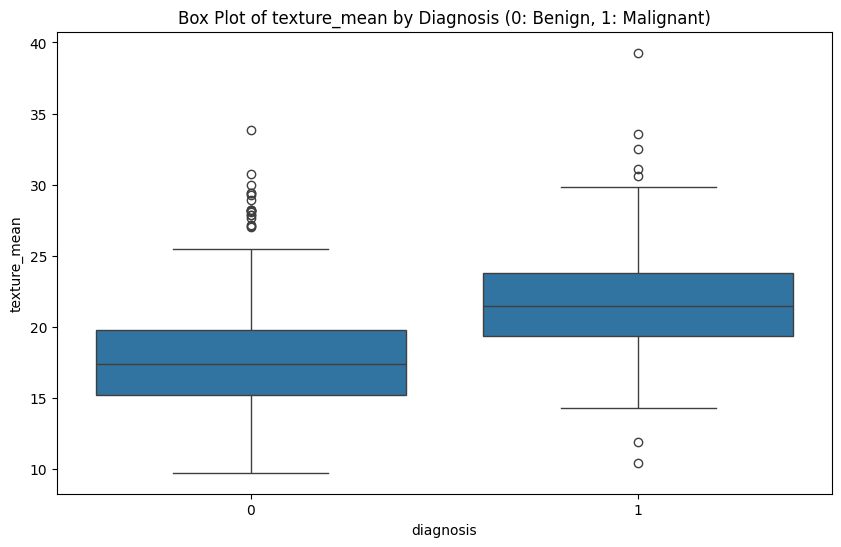

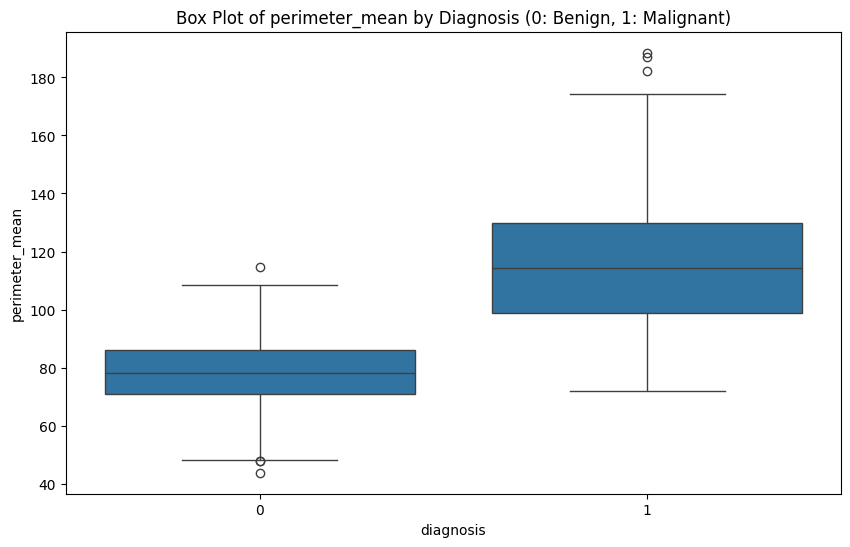

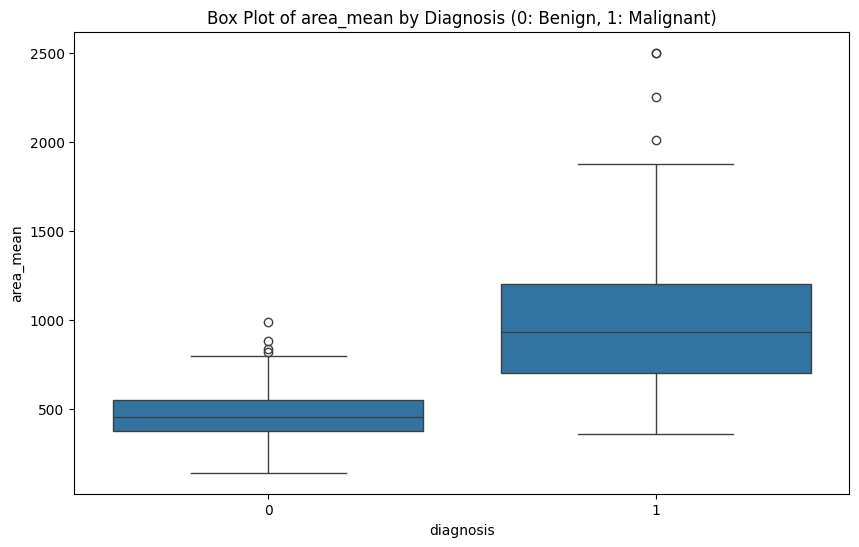

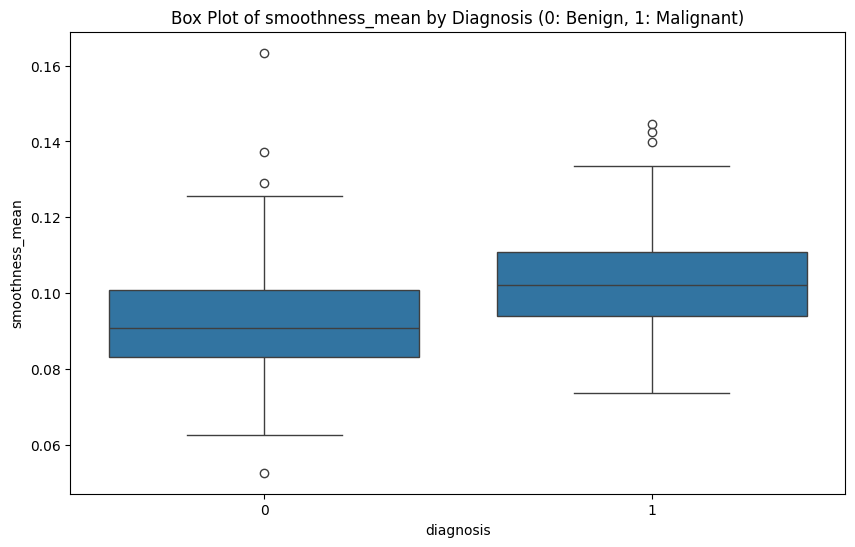

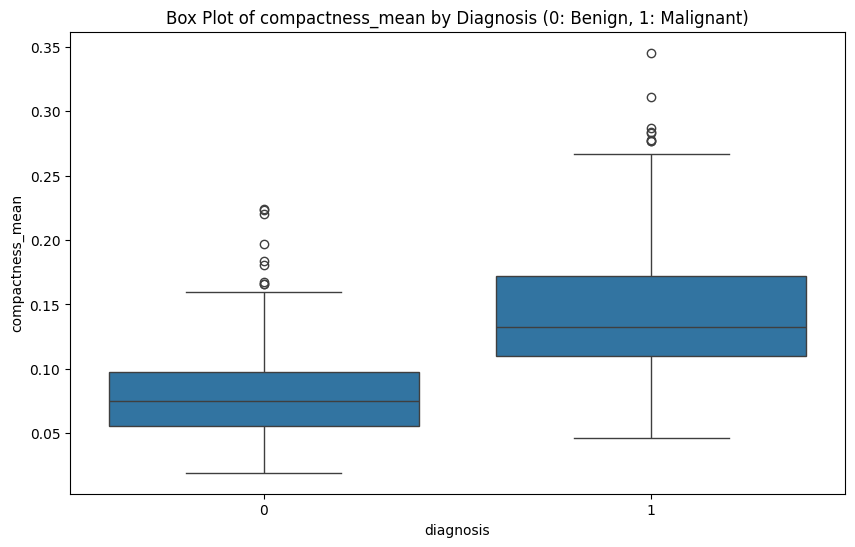

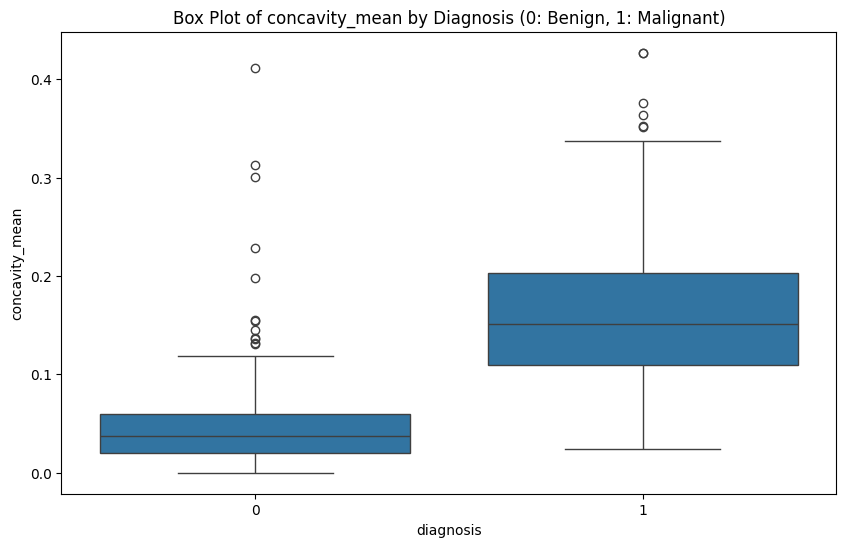

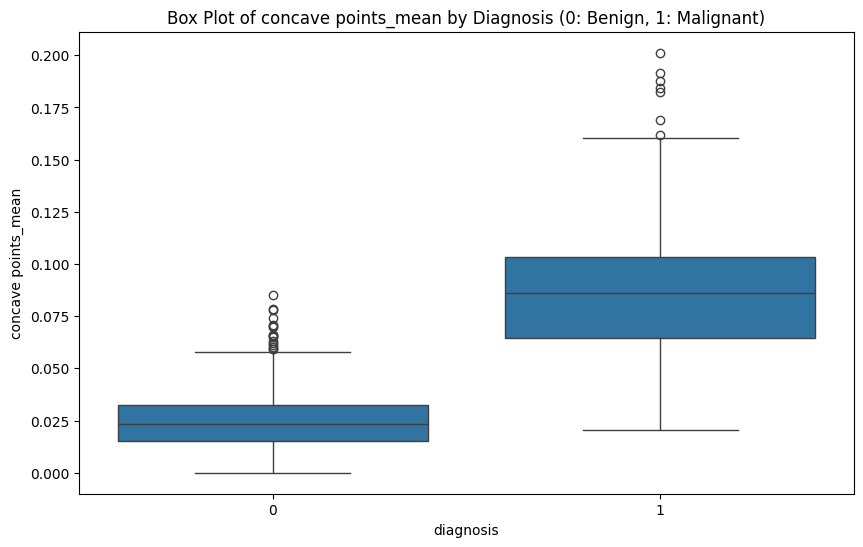

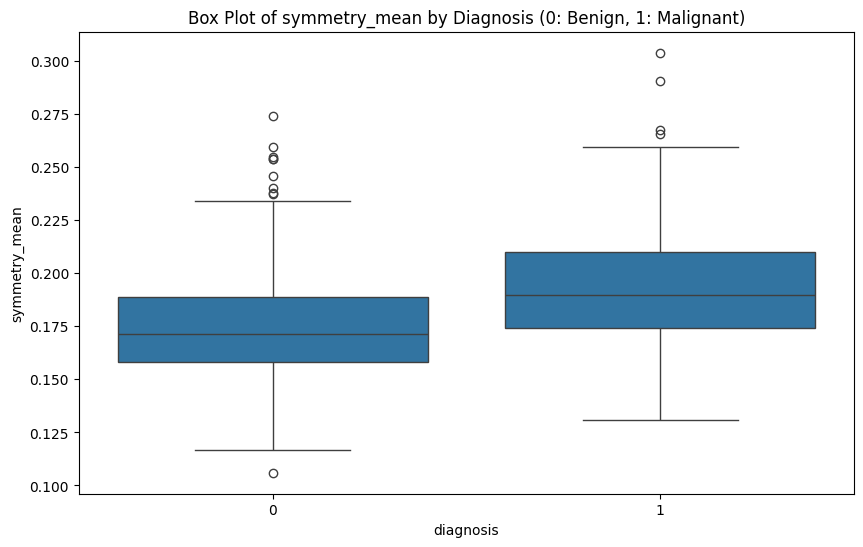

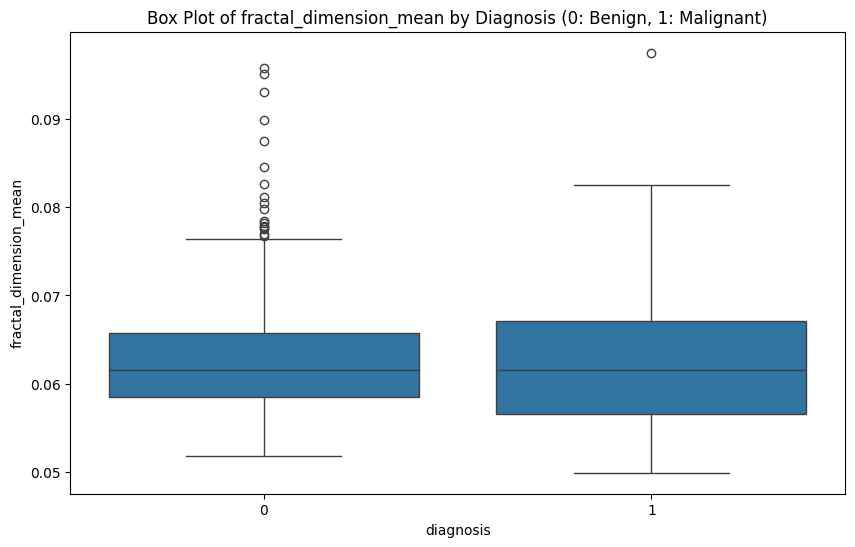

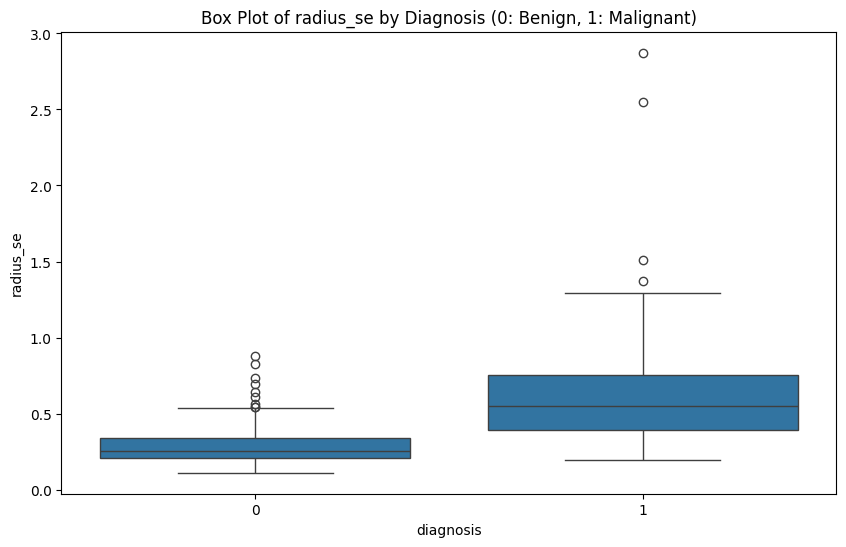

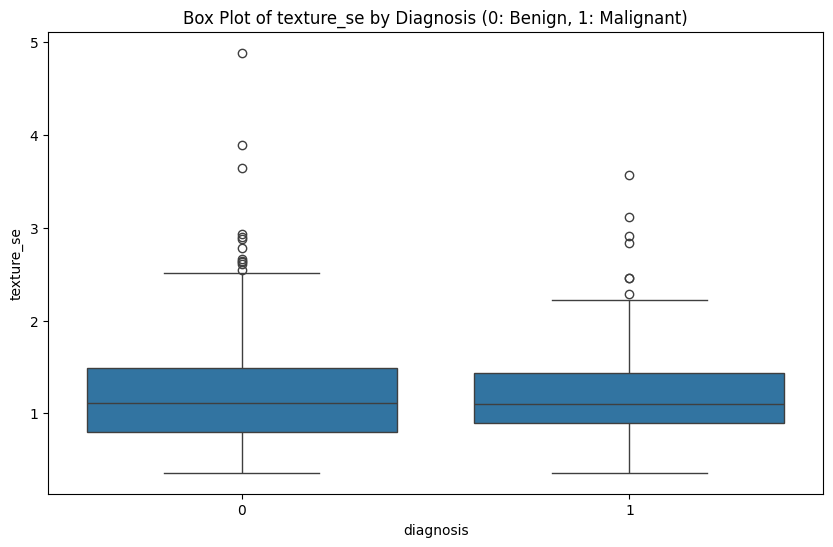

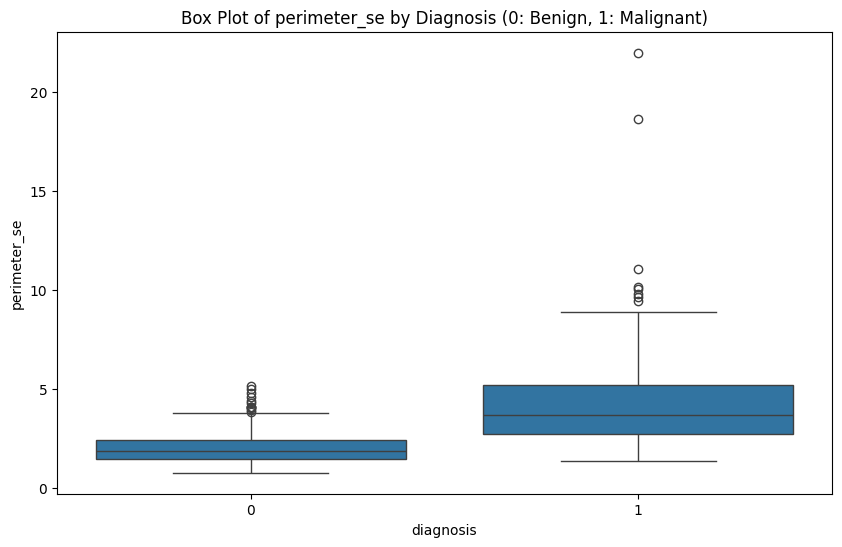

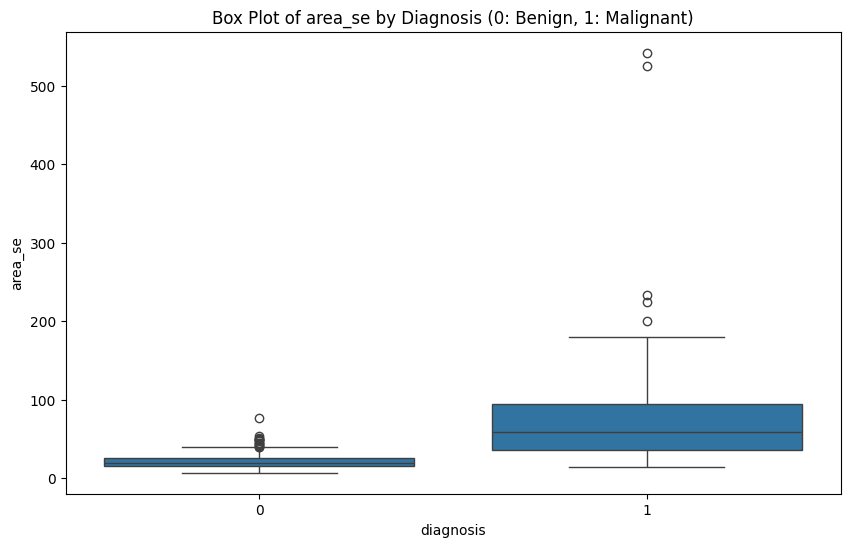

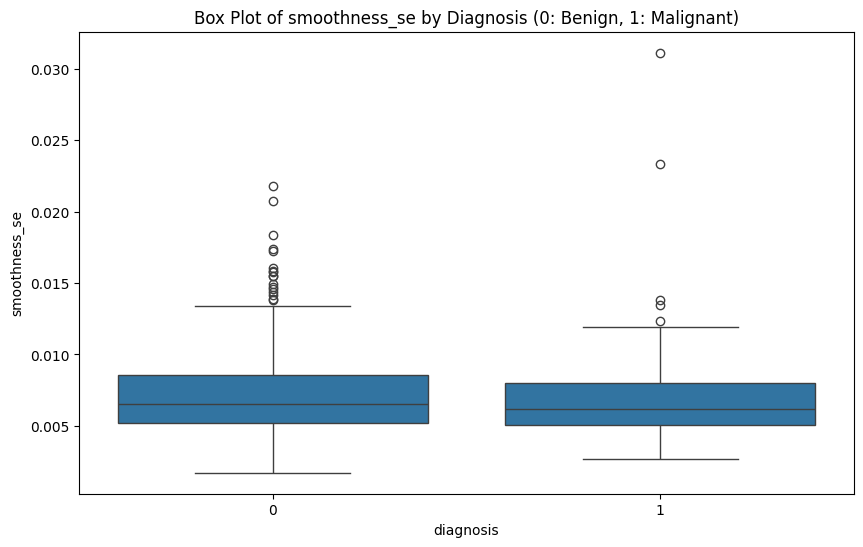

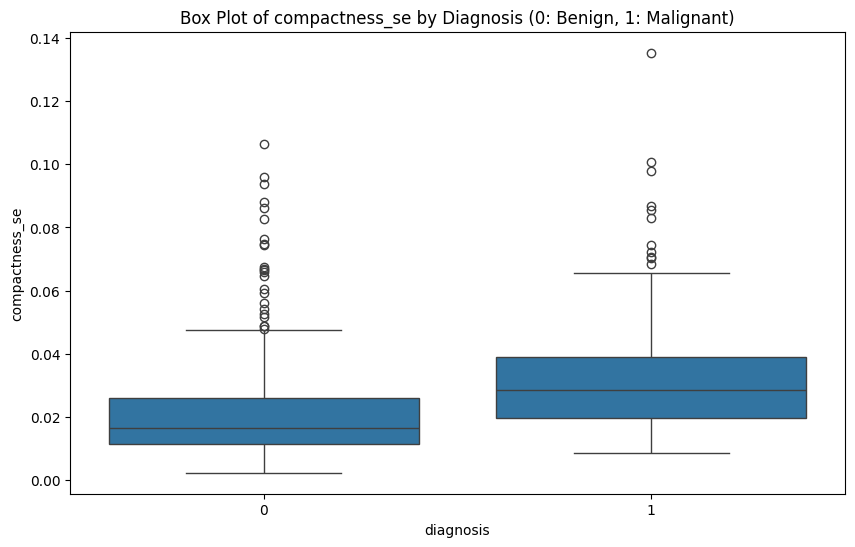

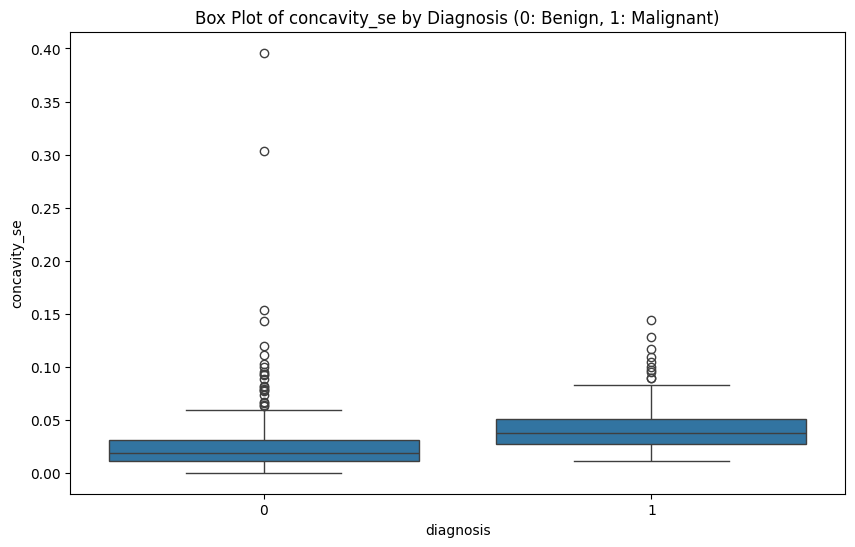

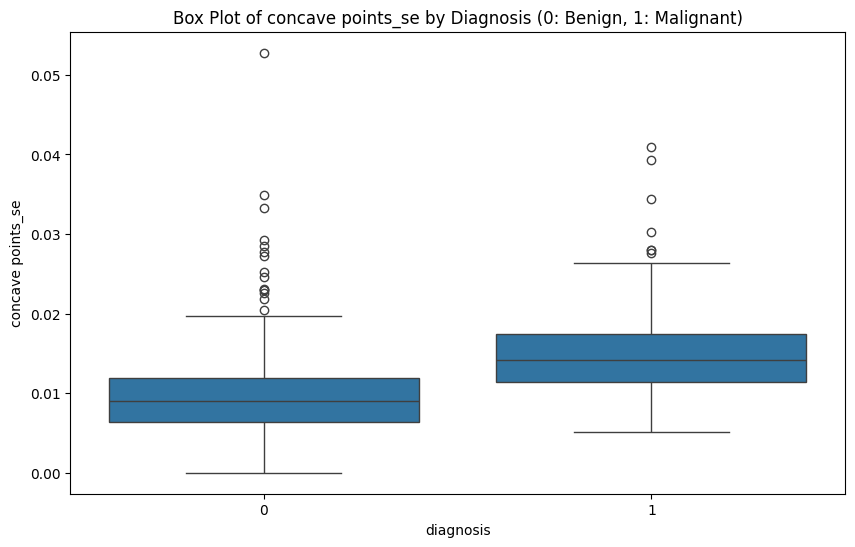

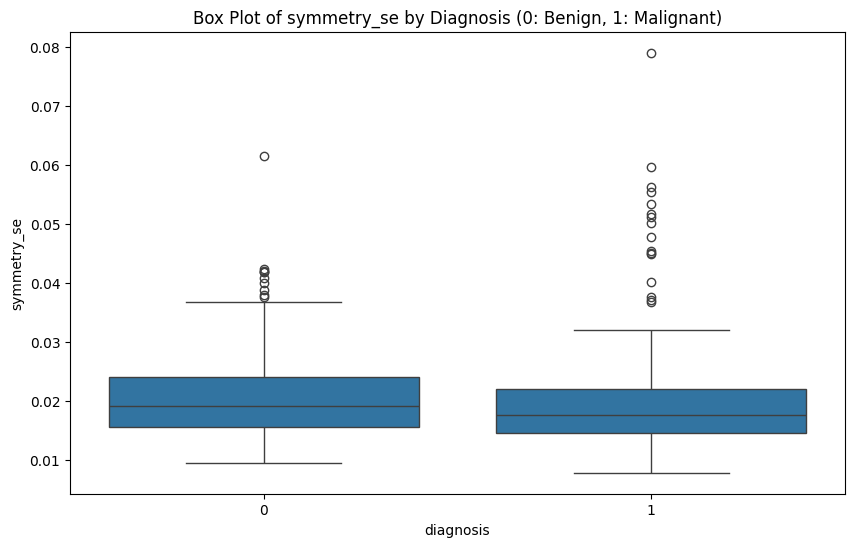

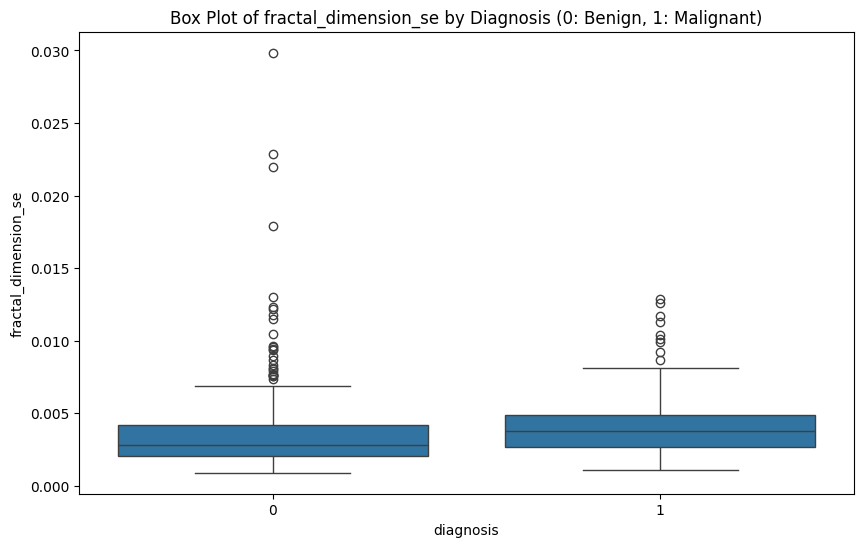

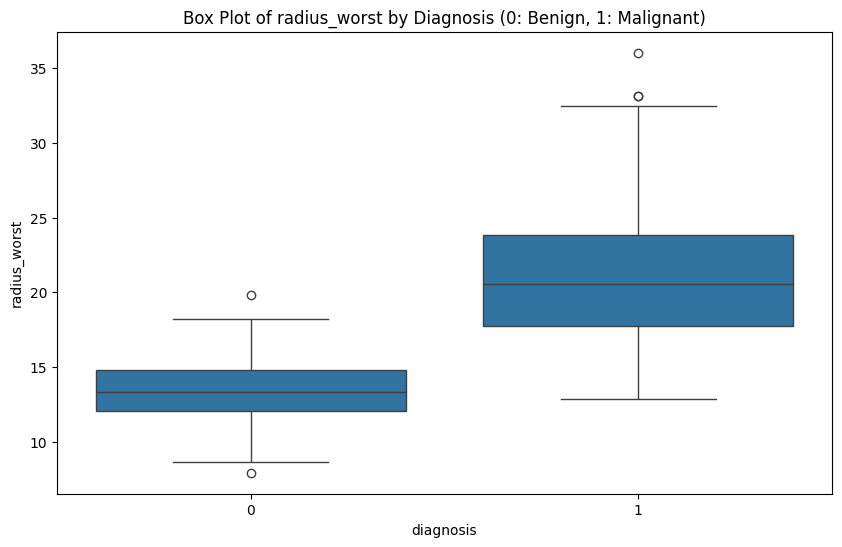

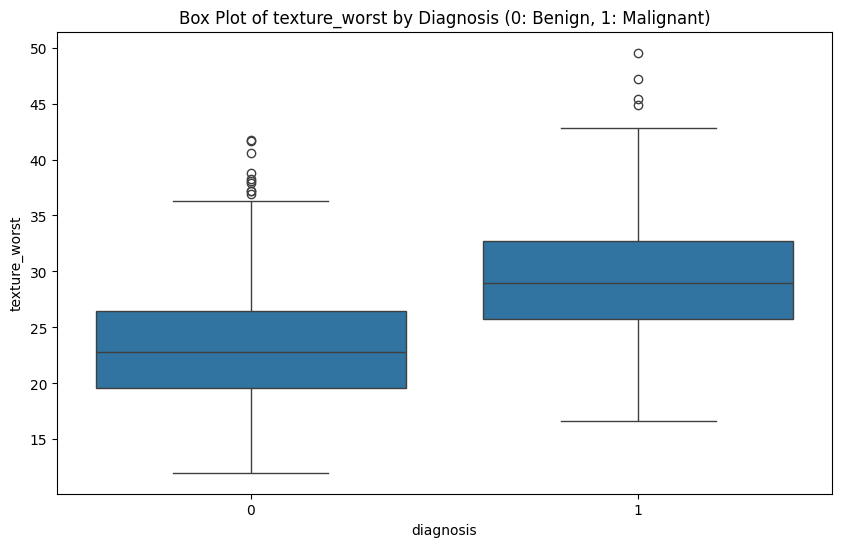

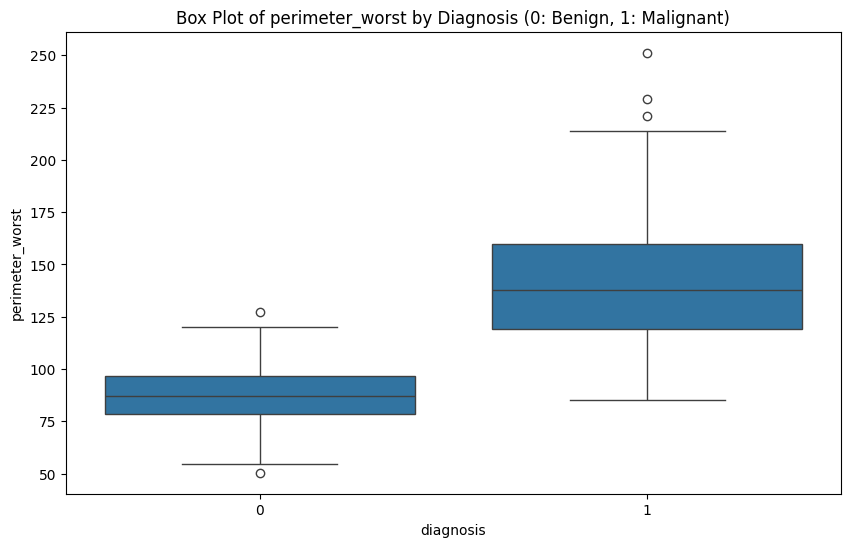

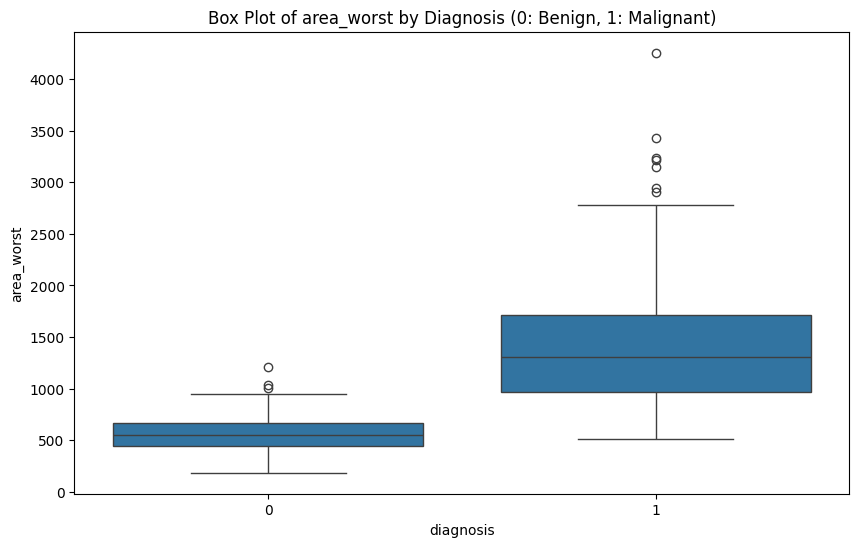

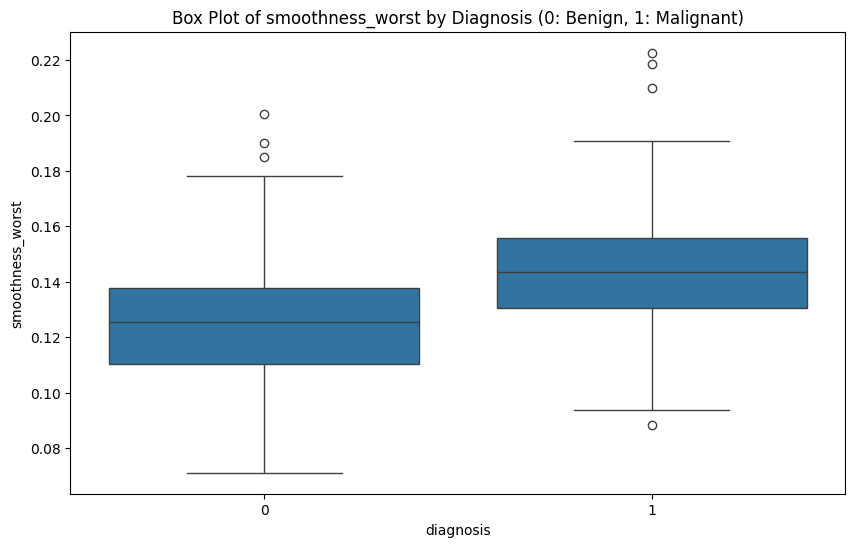

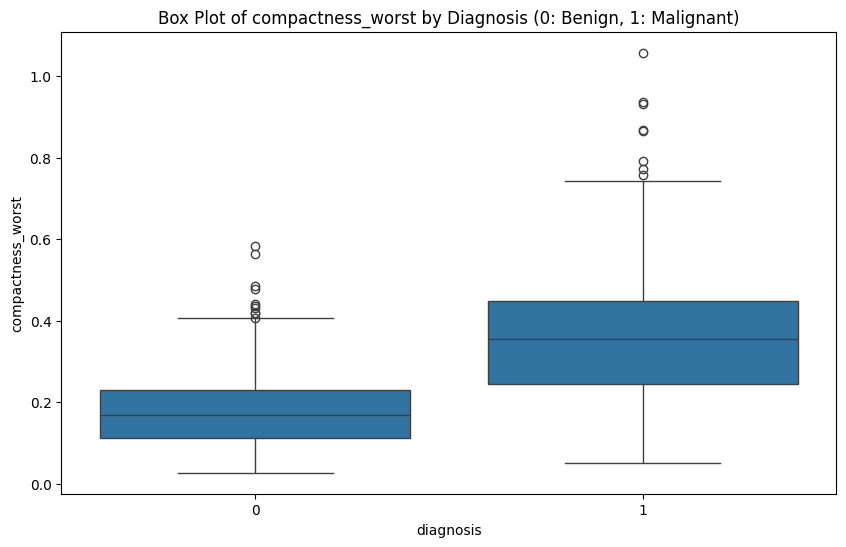

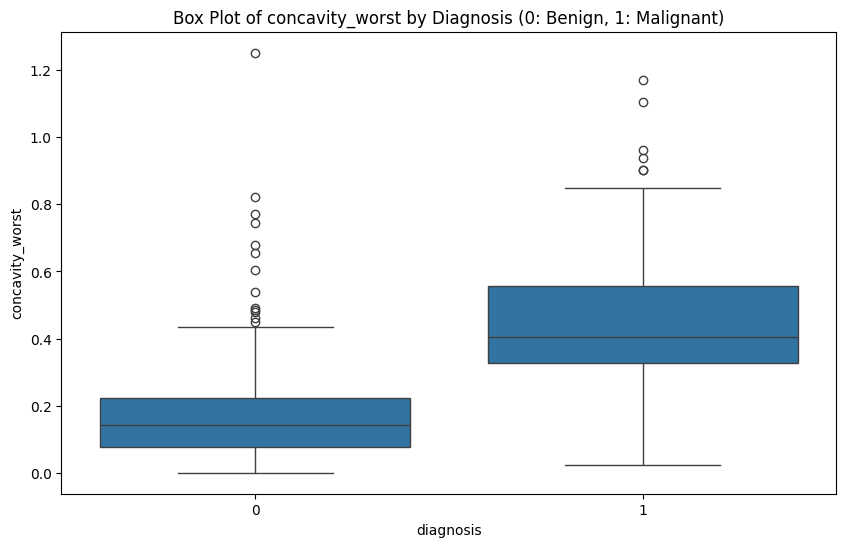

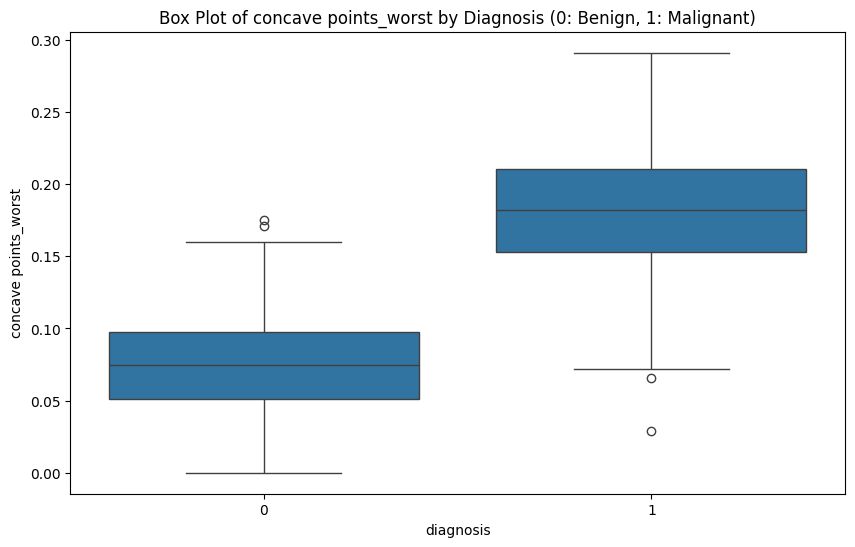

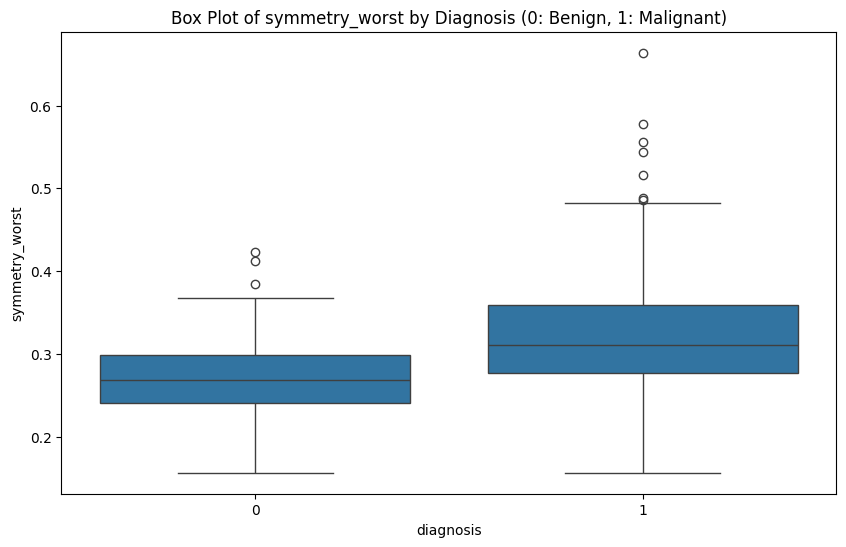

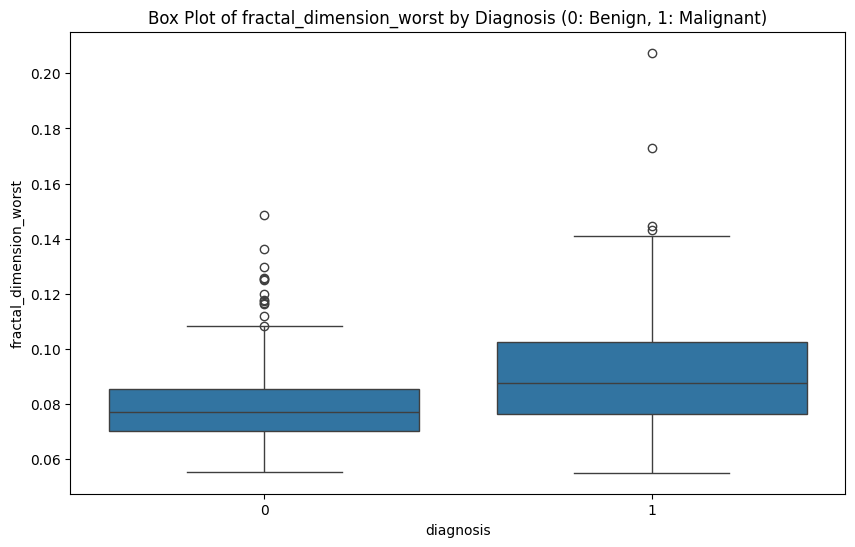

In [ ]:
for column in df.columns:
    if column not in ['id', 'diagnosis']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='diagnosis', y=column, data=df)
        plt.title(f'Box Plot of {column} by Diagnosis (0: Benign, 1: Malignant)')
        plt.show()

Getting ten most important features

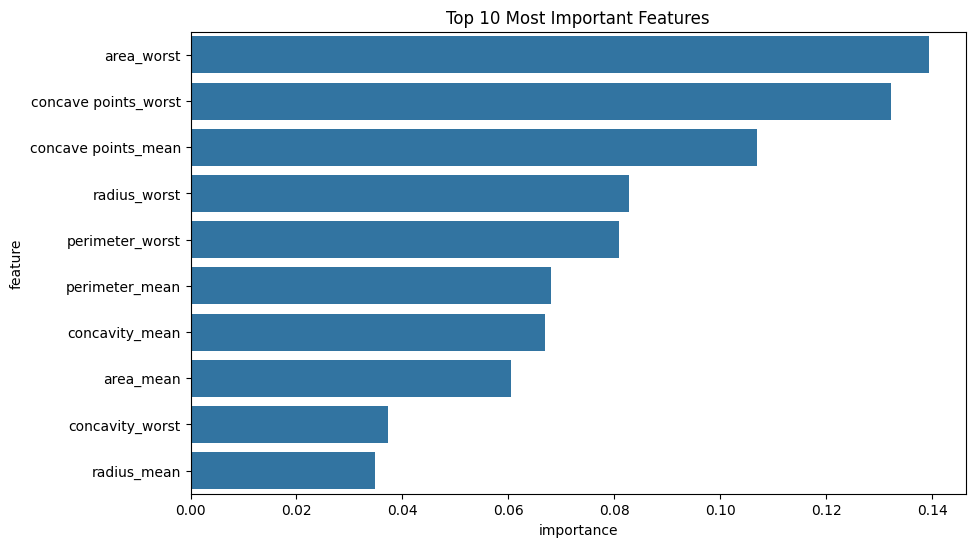

In [ ]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

**Fitting Logisitic Regression**

Dropping the id column

In [ ]:
df = df.drop('id', axis=1)

Setting 'diagnosis' as the target variable

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['diagnosis'])

In [ ]:
X = df.drop('diagnosis', axis=1)

Standarising numeric features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shuffling the data

In [ ]:
X_scaled, y = shuffle(X_scaled, y, random_state=42)

Split into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Training the logistic regression model

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Evaluating the model

In [ ]:
y_val_pred = logreg.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)

y_test_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)

Validation Accuracy: 0.9649122807017544
Validation Precision: 0.9777777777777777
Validation Recall: 0.9361702127659575
Validation F1-Score: 0.9565217391304347
Test Accuracy: 0.9649122807017544
Test Precision: 1.0
Test Recall: 0.9130434782608695
Test F1-Score: 0.9545454545454545


**Deep Learning Model 1: Dense Sequential Model**

Balance the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=42)


Setting random seed

In [ ]:
random.seed(123)

Define the model

In [ ]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

Compile the model and early stopping

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(restore_best_weights=True, patience=15)

Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es], batch_size=32, validation_data=(X_val, y_val))

Epoch 1/1000
14/14 [==============================] - 1s 20ms/step - loss: 0.5656 - accuracy: 0.7460 - val_loss: 0.4859 - val_accuracy: 0.8414
Epoch 2/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.8152 - val_loss: 0.4061 - val_accuracy: 0.8897
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3475 - accuracy: 0.8730 - val_loss: 0.3572 - val_accuracy: 0.9034
Epoch 4/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.3130 - accuracy: 0.8938 - val_loss: 0.3212 - val_accuracy: 0.9172
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2870 - accuracy: 0.9053 - val_loss: 0.2904 - val_accuracy: 0.9172
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.9145 - val_loss: 0.2661 - val_accuracy: 0.9241
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.9261 - val_loss: 0.2469 - val_accuracy: 0.9310
Epoch

Get performance metrics on Validation Set

Validation Loss: 0.1043
Validation Accuracy: 0.9655
5/5 [==============================] - 0s 2ms/step
Validation Precision: 0.9706
Validation Recall: 0.9565
Validation F1-score: 0.9635


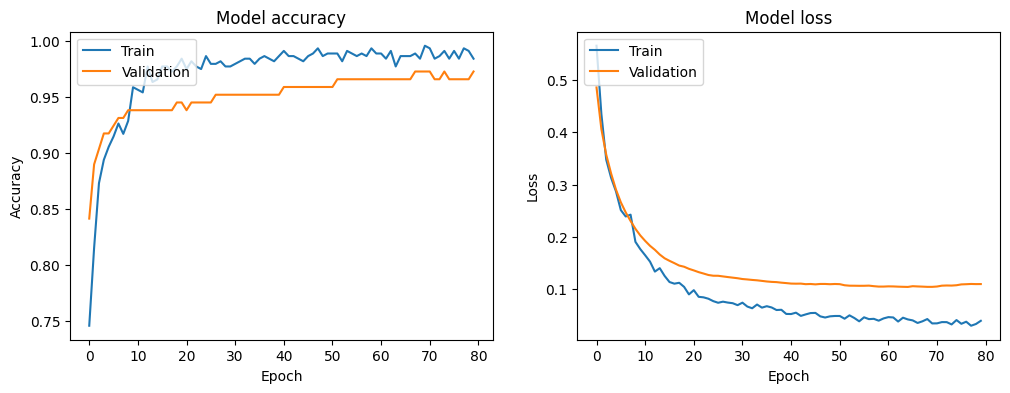

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

y_val_pred = model.predict(X_val)
y_val_pred_classes = (y_val_pred > 0.5).astype(int)

val_precision = precision_score(y_val, y_val_pred_classes)
val_recall = recall_score(y_val, y_val_pred_classes)
val_f1 = f1_score(y_val, y_val_pred_classes)

print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation F1-score: {val_f1:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Get Performance metrics on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

y_test_pred = model.predict(X_test)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

test_precision = precision_score(y_test, y_test_pred_classes)
test_recall = recall_score(y_test, y_test_pred_classes)
test_f1 = f1_score(y_test, y_test_pred_classes)

print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.1040
Test Accuracy: 0.9737
4/4 [==============================] - 0s 3ms/step
Test Precision: 0.9778
Test Recall: 0.9565
Test F1-score: 0.9670


**Deep Learning Model 2: Wide and Deep Model**

Balancing the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=42)


Build the model

In [ ]:
input_layer = Input(shape=(X_train.shape[1],))
hidden1 = Dense(10, activation='relu')(input_layer)

concat = Concatenate()(
  [input_layer, hidden1])
output = Dense(1, activation='sigmoid')(concat)
model = Model(
    inputs=[input_layer],
    outputs=[output])

Compile the model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Apply early stopping

In [ ]:
es = EarlyStopping(restore_best_weights=True, patience=15)

Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es], batch_size=32, validation_data=(X_val, y_val))

Epoch 1/1000
14/14 [==============================] - 6s 88ms/step - loss: 0.6936 - accuracy: 0.6236 - val_loss: 0.5808 - val_accuracy: 0.7172
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.5404 - accuracy: 0.7344 - val_loss: 0.4785 - val_accuracy: 0.7931
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.4362 - accuracy: 0.8037 - val_loss: 0.4107 - val_accuracy: 0.8345
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.3651 - accuracy: 0.8314 - val_loss: 0.3627 - val_accuracy: 0.8621
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.3134 - accuracy: 0.8591 - val_loss: 0.3251 - val_accuracy: 0.8690
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2737 - accuracy: 0.8753 - val_loss: 0.2950 - val_accuracy: 0.8897
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.8915 - val_loss: 0.2704 - val_accuracy: 0.8897
Epoch

Get performance metrics on the validation set

Validation Loss: 0.0982
Validation Accuracy: 0.9655
5/5 [==============================] - 0s 3ms/step
Validation Precision: 0.9706
Validation Recall: 0.9565
Validation F1-score: 0.9635


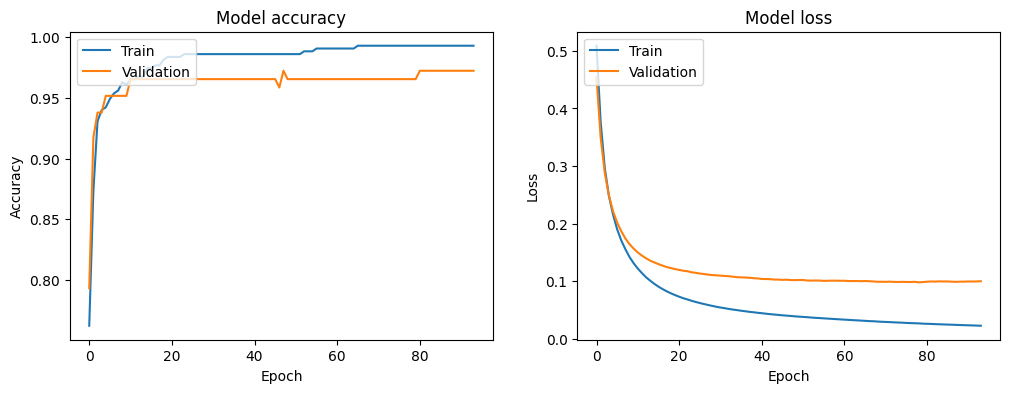

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

y_val_pred = model.predict(X_val)
y_val_pred_classes = (y_val_pred > 0.5).astype(int)

val_precision = precision_score(y_val, y_val_pred_classes)
val_recall = recall_score(y_val, y_val_pred_classes)
val_f1 = f1_score(y_val, y_val_pred_classes)

print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation F1-score: {val_f1:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Get performance metrics on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

y_test_pred = model.predict(X_test)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

test_precision = precision_score(y_test, y_test_pred_classes)
test_recall = recall_score(y_test, y_test_pred_classes)
test_f1 = f1_score(y_test, y_test_pred_classes)

print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.1041
Test Accuracy: 0.9649
4/4 [==============================] - 0s 5ms/step
Test Precision: 0.9773
Test Recall: 0.9348
Test F1-score: 0.9556
